In [15]:
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(DT)
library(kableExtra)
options(knitr.table.format = "html")
library(jpeg)
library(maps)
library(geosphere)
library(grid)
library(evaluate)
library(plotly)
library(ggplot2)

In [16]:
data <- read.table("https://github.com/holtzy/data_to_viz/raw/master/Example_dataset/19_MapConnection.csv", header=T, sep=",")
head(data)

homename,homecontinent,homecountry,homelat,homelon,travelcontinent,travelcountry,travellat,travellon
Canadian in La La Land,North America,United States of America,33.93003,-118.280993,North America,United States of America,33.887255,-118.41191
Canadian in La La Land,North America,United States of America,33.93003,-118.280993,North America,United States of America,34.022100,-118.48100
Canadian in La La Land,North America,United States of America,33.93003,-118.280993,North America,United States of America,34.030400,-118.77900
Canadian in La La Land,North America,United States of America,33.93003,-118.280993,North America,United States of America,33.887255,-118.41191
Canadian in La La Land,North America,United States of America,33.93003,-118.280993,North America,United States of America,33.888889,-118.40528
France,Europe,France,46.22764,2.213749,Africa,Democratic Republic of the Congo,-4.353053,15.25675


In [20]:
# Show long format
tmp <- data %>%
  tail(5) %>%
  mutate(homename = gsub( ", Western Australia", "", homename)) %>%
  mutate(homename = gsub( ", France", "", homename)) %>%
  mutate(homename = gsub( " - Bali - Indonesia", "", homename)) %>%
  mutate(homelat=round(homelat,1), homelon=round(homelon,1), travellat=round(travellat,1), travellon=round(travellon,1)) %>%
  select(homename, homelat, homelon, travelcountry, travellat, travellon)
tmp
tmp %>% kable() %>% kable_styling(bootstrap_options = "striped", full_width = F)

homename,homelat,homelon,travelcountry,travellat,travellon
Bridgetown,-34.0,116.1,Australia,-34.2,115.0
Lille,50.6,3.1,France,45.0,-1.2
MX,23.6,-102.6,Mexico,21.0,-101.2
Kuta,-8.7,115.2,Indonesia,-8.7,115.2
Kuta,-8.7,115.2,Indonesia,-8.7,115.2


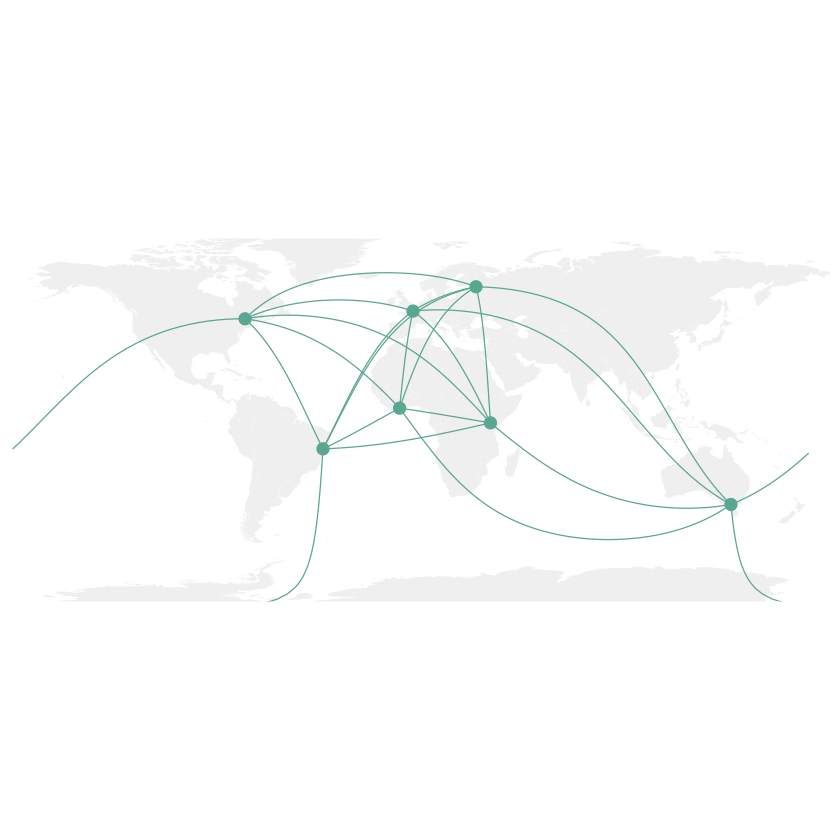

In [21]:
# give the target places coridnation
don=rbind(
    Paris=c(2,49),
    Melbourne=c(145,-38),
    Saint.Petersburg=c(30.32, 59.93),
    Abidjan=c(-4.03, 5.33),
    Montreal=c(-73.57, 45.52),
    Nairobi=c(36.82, -1.29),
    Salvador=c(-38.5, -12.97)
    )  %>% as.data.frame()
colnames(don)=c("long","lat")


all_pairs=cbind(t(combn(don$long, 2)), t(combn(don$lat, 2))) %>% as.data.frame()
colnames(all_pairs)=c("long1","long2","lat1","lat2")

plot_my_connection=function( dep_lon, dep_lat, arr_lon, arr_lat, ...){
    inter <- gcIntermediate(c(dep_lon, dep_lat), c(arr_lon, arr_lat), n=50, addStartEnd=TRUE, breakAtDateLine=F)             
    inter=data.frame(inter)
    diff_of_lon=abs(dep_lon) + abs(arr_lon)
    if(diff_of_lon > 180){
        lines(subset(inter, lon>=0), ...)
        lines(subset(inter, lon<0), ...)
    }else{
        lines(inter, ...)
        }
}

# background map
par(mar=c(0,0,0,0))
map('world',col="#f2f2f2", fill=TRUE, bg="white", lwd=0.05,mar=rep(0,4),border=0, ylim=c(-80,80) )
 
# add every connections:
for(i in 1:nrow(all_pairs)){
    plot_my_connection(all_pairs$long1[i], all_pairs$lat1[i], all_pairs$long2[i], all_pairs$lat2[i], col="#69b3a2", lwd=1)
    }
 
# add points and names of cities
points(x=don$long, y=don$lat, col="#69b3a2", cex=2, pch=20)
